In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **ANALISIS EXPLORATORIO - MACHINE LEARNING**

Instalamos las librerías con las que vamos a trabajar

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Instalamos las librerías con las que vamos a trabajar

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/base_datos_completa_api.csv")

In [6]:
# Creamos la columna de nombres.

# Defino un dicc, con cada inical para cada plataforma
nombres_plataforma = {'a': 'amazon', 'd': 'disney', 'h': 'hulu', 'n': 'netflix'}

# Crear una nueva columna con las iniciales y los nombres asociados
df['platform'] = df['id'].apply(lambda x: nombres_plataforma[x[0]])

#Corroboro los cambios
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score_mean,platform
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,3.55,amazon
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,3.50,amazon
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,3.54,amazon
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,3.48,amazon


## **EXPLORACIÓN GENERAL DEL DATASET**

#### ***Descripción general de los datos***

Este comando nos dará información general sobre el dataset: número de registros, número de columnas, tipo de datos de cada columna, etc.
Con estos comandos podemos obtener información básica del dataframe, como el número de filas y columnas, los nombres de las columnas, y estadísticas descriptivas de las variables numéricas. También podemos ver si hay valores nulos o faltantes en el dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration       22516 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  id             22998 non-null  object 
 13  duration_int   22998 non-null  int64  
 14  duration_type  22516 non-null  object 
 15  score_mean     22998 non-null  float64
 16  platform       22998 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 

#### ***Valores únicos***

Este comando nos dará el número de valores únicos para cada variable del dataset.

In [8]:
df.nunique()

show_id           9668
type                 2
title            22042
director         10095
cast             16744
country            886
date_added        2003
release_year       101
rating             105
duration           253
listed_in         1687
description      22669
id               22998
duration_int       225
duration_type        3
score_mean          38
platform             4
dtype: int64

#### ***Valores nulos***

Este comando nos permitirá saber cuántos valores nulos hay en cada columna del dataset.

In [9]:
df.isnull().sum()

show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int         0
duration_type      482
score_mean           0
platform             0
dtype: int64

#### ***Visualización de la base de datos***

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score_mean,platform
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,min,3.55,amazon
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,min,3.50,amazon
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,69,min,3.54,amazon
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,min,3.48,amazon


## **ANÁLISIS EXPLORATORIO DE VARIABLES ESPECÍFICAS**

#### ***Distribución de variables numéricas***

La cual nos permitirá ver la distribución de las variables numéricas en el dataset

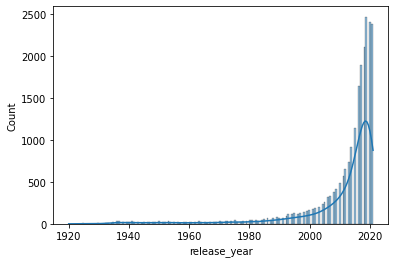

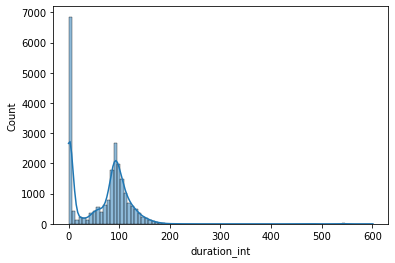

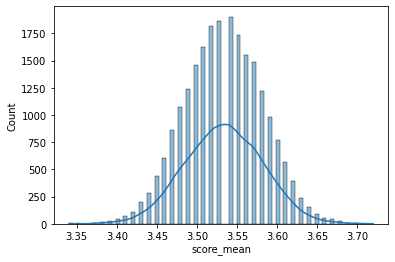

In [11]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
for var in num_vars:
    sns.histplot(data=df, x=var, kde=True)
    plt.show()

El siguiente código genera un histograma para cada variable numérica del DataFrame utilizando la librería "Seaborn". El bucle "for" recorre cada variable numérica y utiliza "sns.histplot" para crear un histograma con una distribución de densidad kernel. Luego, "plt.show()" muestra el histograma generado para cada variable en una ventana separada.

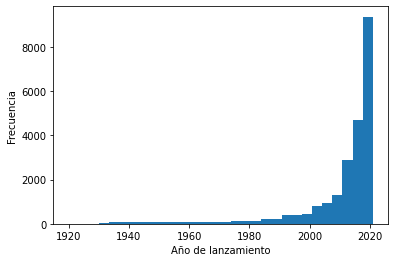

In [12]:
plt.hist(df['release_year'], bins=30)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

El código genera un gráfico que muestra cuántos contenidos se lanzaron cada año en la plataforma de streaming. El eje horizontal muestra los años y el eje vertical muestra la frecuencia de lanzamiento de los contenidos.

#### ***Gráfico de dispersión de las variables release_year y score_mean***

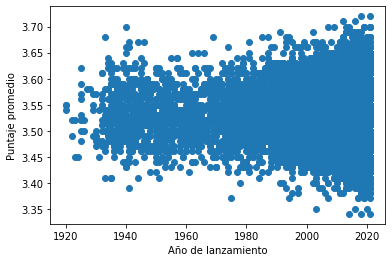

In [13]:
plt.scatter(x=df['release_year'], y=df['score_mean'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Puntaje promedio')
plt.show()

## **ANÁLISIS DE CONTENIDO POR PLATAFORMA**

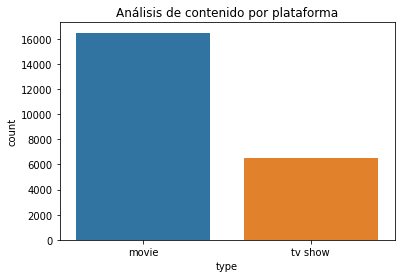

In [14]:
sns.countplot(x='type', data=df)
plt.title('Análisis de contenido por plataforma')
plt.show()

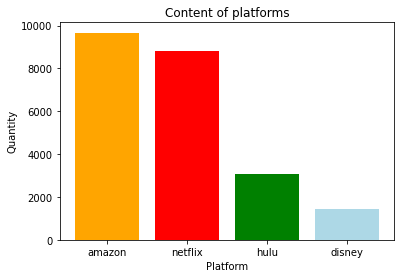

In [15]:
frecuencia = df['platform'].value_counts()

# Definir una lista de colores
colores = ['orange', 'red', 'green', 'lightblue']

# Genermos el gráfico de barras con los colores asignados
plt.bar(frecuencia.index, frecuencia.values, color=colores)

# Agregar etiquetas y título
plt.xlabel('Platform')
plt.ylabel('Quantity')
plt.title('Content of platforms')

# Mostrar el gráfico
plt.show()

## **ANÁLISIS DE CONTENIDO POR PAÍS**

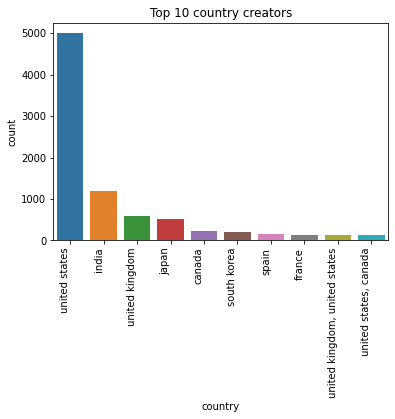

In [16]:
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:10])
plt.title('Top 10 country creators')
plt.xticks(rotation=90, ha='right')
plt.show()

## **ANÁLISIS DE CONTENIDO POR USUARIO**

In [17]:
users_count = df['id'].nunique()
print('Hay {} usuarios en la base de datos.'.format(users_count))

Hay 22998 usuarios en la base de datos.


In [18]:
active_users = df.groupby('id').agg({'show_id': 'count', 'platform': 'first'}).sort_values('id', ascending=False)
active_users.columns = ['count', 'platform']
top_10_active_users = active_users.head(10)
df_top_users = top_10_active_users
df_top_users

,count,platform
id,,
ns999,1,netflix
ns998,1,netflix
ns997,1,netflix
ns996,1,netflix
ns995,1,netflix
ns994,1,netflix
ns993,1,netflix
ns992,1,netflix
ns991,1,netflix


## **ANÁLISIS DE CONTENIDO POR POPULARIDAD**

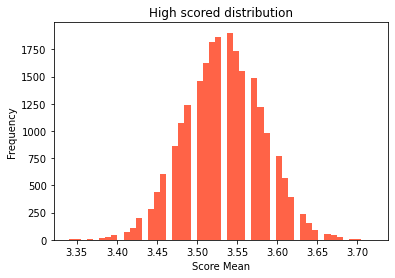

In [19]:
plt.hist(df['score_mean'], bins=50, color="tomato")
plt.title('High scored distribution')
plt.xlabel('Score Mean')
plt.ylabel('Frequency')
plt.show()

## **ANÁLISIS DE RATING POR CONTENIDO**

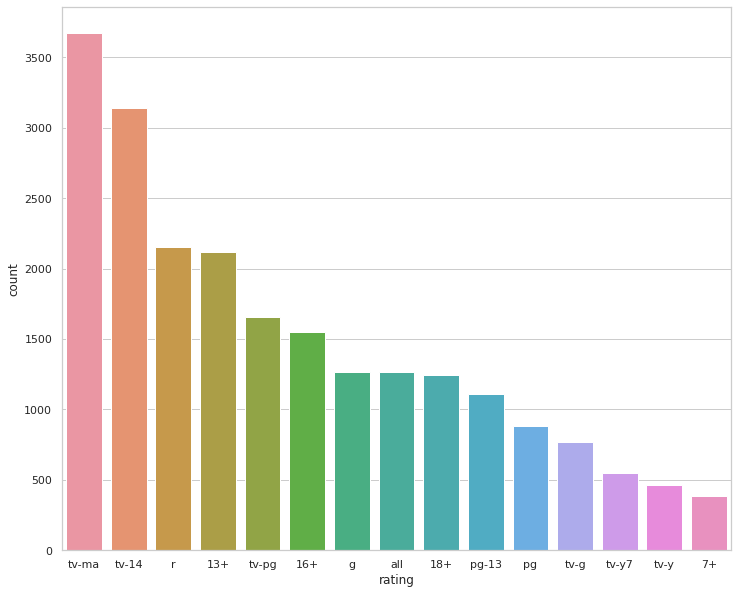

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data= df, order=df['rating'].value_counts().index[0:15])

La mayoría del contenido está etiquetado como 'TV-MA' y solo es adecuado para adultos. 

La segunda calificación más común es 'TV-14', que indica que puede no ser adecuado para niños menores de 14 años. 

La tercera calificación más popular es 'R', que indica que el contenido puede ser inapropiado para menores de 17 años y requiere la supervisión de un adulto.

## **ANÁLISIS DE DIRECTORES CON MÁS PELICULAS**

In [21]:
director_count = df['director'].value_counts()
director_count.head(10)

mark knight               113
cannis holder              61
jay chapman                46
moonbug entertainment      37
arthur van merwijk         30
manny rodriguez            27
jay karas                  22
john english               20
rajiv chilaka              19
raúl campos, jan suter     18
Name: director, dtype: int64

## **CORRELACIÓN ENTRE LA 'DURATION' Y 'SCORE'**

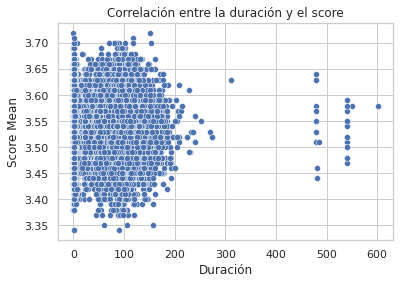

In [22]:
sns.scatterplot(x='duration_int', y='score_mean', data=df)
plt.title('Correlación entre la duración y el score')
plt.xlabel('Duración')
plt.ylabel('Score Mean')
plt.show()

## **DETECCIÓN DE OUTLIERS**

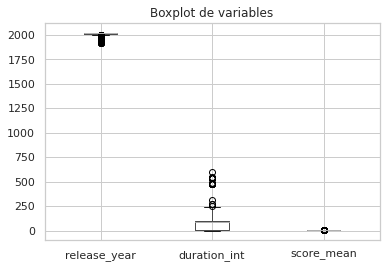

In [23]:
df[['release_year', 'duration_int', 'score_mean']].boxplot()
plt.title('Boxplot de variables')
plt.show()

# **CONCLUSIONES**

Una vez finalizado nuestro EDA, notamos que tenemos 3 variables fundamentales. El "ID", el "SCORE_MEAN" y el "USERID"(que nos falta anexar a nuestra tabla actual)

In [24]:
# Procedemos a realizar la importación de los archivos csv, de la carpeta ratings 
rating1 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/1.csv')
rating2 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/2.csv')
rating3 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/3.csv')
rating4 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/4.csv')
rating5 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/5.csv')
rating6 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/6.csv')
rating7 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/7.csv')
rating8 = pd.read_csv('/content/drive/MyDrive/ML_y_DataEngineer/ML_y_DataEngineer/ratings/8.csv')

#Unifico los 7 archivos csv, ya que contienen el mismo nombre de 

score_df = pd.concat([rating1, rating2, rating3, rating4, rating5, rating6, rating7,rating8], ignore_index=True) 

In [25]:
#cambiamos de nombre para que reconozcamos mucho mejor los datos y los pasos que se hizo en el archivo de ETL
score_df.rename(columns={'movieId': 'id'}, inplace=True)
score_df.timestamp= pd.to_datetime(score_df.timestamp, unit="s").dt.date
score_df.rename(columns={'rating': 'score'}, inplace=True)
score_df = score_df.applymap(lambda x: x.lower() if type(x) == str else x)


In [26]:
#UNIMOS nuestras bases de datos, el "df" y el "score_df"
base_datos_ml = pd.merge(df, score_df, on='id')

In [27]:
# Verificamos
base_datos_ml.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score_mean,platform,userId,score,timestamp
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon,543,5.0,2003-07-30
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon,595,3.0,1996-08-13
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon,611,3.0,2001-01-03
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon,2523,3.5,2012-06-25
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,min,3.47,amazon,3082,4.0,2000-03-30


####            Por tanto ahora si manejaremos las 3 variables. "id", "score" y "userId"

# **DATASET MACHINE LEARNING**

# **DATASET MACHINE LEARNING**

El proceso de EDA ha sido fundamental para detectar variables que más importancia tienen para hacer un modelo ML que nos prediga "recomendaciones".

El "ID", el "SCORE" y el "USERID". 

*   **'id'**: Nos ientifica de manera **única** a **cada película**. Nos asegura que el modelo no recomiende dos veces la misma película a un usuario.
*   **'score'**: Es la variable a predecir en el modelo de recomendación. Al incluir el score dejo una **pista importante para el algoritmo de aprendizaje automático** sobre lo que tiene que saber predecir. **VARIABLE OBJETIVO**


*   **'userId'**: Identifica de manera única a cada usuario en nuestra base de datos "df". Es importante incluirlo, ya que **el objetivo es hacer recomendaciones personalizadas** para cada usuario.


In [28]:
#Armamos un nuevo dataframe pero solo con las columnas que necesitaremos
base_datos_columnas = base_datos_ml[['id','title','userId','score']]

In [29]:
# Agrupamos el dataset por los valores únicos de la columna de plataformas
grupos = base_datos_ml.groupby("platform")

# Creamos una lista vacía para almacenar los datos muestreados
muestra = []

# Iterar sobre cada grupo
for grupo in grupos:
    tamano_muestra = int(len(grupo[1]) / len(base_datos_ml) * 400000)     #Tamaño de la muestra
    muestra_grupo = grupo[1].sample(tamano_muestra, random_state = 42)   # Muestra aleatoria
    muestra.append(muestra_grupo)   # Introducirá a la variable muestra
nuevo_datos = pd.concat(muestra)    # Combinamos todas las muestras en un solo dataset

In [31]:
nuevo_datos.head()
nuevo_datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399997 entries, 1669223 to 9827083
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   show_id        399997 non-null  object 
 1   type           399997 non-null  object 
 2   title          399997 non-null  object 
 3   director       256224 non-null  object 
 4   cast           307526 non-null  object 
 5   country        200151 non-null  object 
 6   date_added     233864 non-null  object 
 7   release_year   399997 non-null  int64  
 8   rating         399997 non-null  object 
 9   duration       391437 non-null  object 
 10  listed_in      399997 non-null  object 
 11  description    399911 non-null  object 
 12  id             399997 non-null  object 
 13  duration_int   399997 non-null  int64  
 14  duration_type  391437 non-null  object 
 15  score_mean     399997 non-null  float64
 16  platform       399997 non-null  object 
 17  userId         399997 

In [32]:
dataset_ML = nuevo_datos[['id', 'title', 'userId', 'score']]

In [33]:
dataset_ML.head()

,id,title,userId,score
1669223,as3480,30 days of yoga for beginners | calm mind & bo...,109303,4.5
650417,as1357,pay the ghost,32160,3.5
4276094,as8923,koch brothers exposed,253054,3.0
2822661,as5887,fanboys,7372,3.0
1631434,as3402,a one-hour world tour,75663,3.0


In [34]:
#Convierto el dataset a archivo parquet, para levantarlo.

dataset_ML.to_parquet('dataset_ML.parquet')